<a href="https://colab.research.google.com/github/Edison1847/Decision-tree-simple-tutorial/blob/main/Decision%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import graphviz
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
%matplotlib


Using matplotlib backend: <object object at 0x7a9d003cb670>


Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **2. Import the training dataset**

In [3]:
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/Decision Tree/
data = 'datasheetHD.csv'
df = pd.read_csv(data)
df.head()

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/Decision Tree


,age,gender,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,Ischemic Heart Disease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


**Summary of the data set**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1190 non-null   int64  
 1   gender                  1190 non-null   int64  
 2   chest pain type         1190 non-null   int64  
 3   resting bp s            1190 non-null   int64  
 4   cholesterol             1190 non-null   int64  
 5   fasting blood sugar     1190 non-null   int64  
 6   resting ecg             1190 non-null   int64  
 7   max heart rate          1190 non-null   int64  
 8   exercise angina         1190 non-null   int64  
 9   oldpeak                 1190 non-null   float64
 10  ST slope                1190 non-null   int64  
 11  Ischemic Heart Disease  1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


1. There are 11 categories/features (age-ST slope) and the last category(Ishchemic heart disease) is the target variable (prediction)
2. There are data of 1190 individuals / rows

---
### **We are not doing data preprocessing to make the tutorial simple**
---

# **3. Declare feature vectors (training data) and target variable (prediction)**

In [5]:
X = df.drop(['Ischemic Heart Disease'], axis=1)

y = df['Ischemic Heart Disease']

# **4. Split data into separate training and test set**

In [6]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [7]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((797, 11), (393, 11))

In [8]:
X_train.head()

,age,gender,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
252,48,1,4,120,260,0,0,115,0,2.0,2
330,60,1,4,130,0,1,1,130,1,1.1,3
851,62,1,3,130,231,0,0,146,0,1.8,2
215,47,1,4,150,226,0,0,98,1,1.5,2
1075,54,1,2,192,283,0,2,195,0,0.0,1


In [9]:
X_test.head()

,age,gender,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
825,64,1,3,125,309,0,0,131,1,1.8,2
443,51,1,4,128,0,1,1,125,1,1.2,2
506,55,1,3,136,245,1,1,131,1,1.2,2
1152,42,1,4,136,315,0,0,125,1,1.8,2
364,56,1,4,120,0,0,1,148,0,0.0,2


**-- We now have training and test set ready for model building. --**

# **5. Initiate Decision Tree**

In [10]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# **6. Prediction**

In [11]:
y_pred_gini = clf_gini.predict(X_test)
# Check accuracy score with criterion gini index
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7659


**Comparing the train-set and test-set accuracy to check for overfitting.**

In [12]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8457


**Check for overfitting and underfitting**

In [13]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8457
Test set score: 0.7659


# **7. Visualize decision-trees**

In [14]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

[Text(0.5, 0.875, 'x[10] <= 1.5\ngini = 0.499\nsamples = 797\nvalue = [383, 414]'),
 Text(0.25, 0.625, 'x[2] <= 3.5\ngini = 0.308\nsamples = 363\nvalue = [294, 69]'),
 Text(0.125, 0.375, 'x[9] <= 2.2\ngini = 0.122\nsamples = 245\nvalue = [229, 16]'),
 Text(0.0625, 0.125, 'gini = 0.095\nsamples = 241\nvalue = [229, 12]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.375, 'x[4] <= 42.5\ngini = 0.495\nsamples = 118\nvalue = [65, 53]'),
 Text(0.3125, 0.125, 'gini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(0.4375, 0.125, 'gini = 0.453\nsamples = 95\nvalue = [62, 33]'),
 Text(0.75, 0.625, 'x[2] <= 3.5\ngini = 0.326\nsamples = 434\nvalue = [89, 345]'),
 Text(0.625, 0.375, 'x[7] <= 127.5\ngini = 0.493\nsamples = 138\nvalue = [61, 77]'),
 Text(0.5625, 0.125, 'gini = 0.219\nsamples = 40\nvalue = [5, 35]'),
 Text(0.6875, 0.125, 'gini = 0.49\nsamples = 98\nvalue = [56, 42]'),
 Text(0.875, 0.375, 'x[1] <= 0.5\ngini = 0.171\nsamples = 296\nvalue = [28, 268]'),

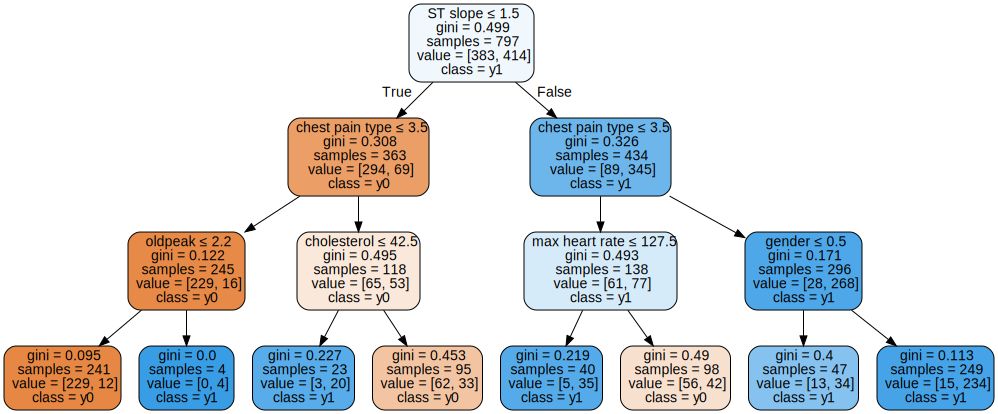

In [15]:
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=True,
                              filled=True, rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Decision_Tree_Graph", format="png")
graph

# **8. Check the Accuracy**

In [16]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[147  31]
 [ 61 154]]


**Get the accuracy report**

In [17]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       178
           1       0.83      0.72      0.77       215

    accuracy                           0.77       393
   macro avg       0.77      0.77      0.77       393
weighted avg       0.78      0.77      0.77       393



**Specificity**

In [18]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_gini).ravel()
specificity = tn / (tn+fp)
specificity

0.8258426966292135

**Sensitivity**

In [22]:
sensitivity = tp / (tp + fn)
sensitivity

0.7162790697674418

# **ROC & AUC**

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get the false positive rate, true positive rate, and thresholds from the ROC curve.
fpr, tpr, _ = roc_curve(y_test, y_pred_gini)

# Calculate the area under the ROC curve.
roc_auc = auc(fpr, tpr)

# Plot the ROC curve.
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)

# Plot a diagonal line from (0, 0) to (1, 1).
plt.plot([0, 1], [0, 1], "k-")

# Set the limits of the plot.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the labels of the axes.
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Set the title of the plot.
plt.title("Receiver operating characteristic")

# Add a legend.
plt.legend(loc="lower right")

# Show the plot.
plt.show()